In [1]:
# [1]: Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# [2]: Generate synthetic dataset
from sklearn.datasets import make_classification

# make_classification generates a synthetic dataset with given parameters
# n_samples: Number of data points
# n_features: Number of input features
# random_state: Ensures reproducibility
data, labels = make_classification(n_samples=1000, n_features=5, random_state=42)

In [3]:
# [3]: Convert to DataFrame for better visualization
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])
df['Label'] = labels

In [4]:
# [4]: Display the first few rows of the DataFrame
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Label
0,-0.439643,0.542547,-0.822420,0.401366,-0.854840,0
1,2.822231,-2.480859,-1.147691,-2.101131,3.040278,1
2,1.618386,-1.369478,-2.084113,-1.179659,1.613602,1
3,1.659048,-0.615202,1.112688,-0.835098,-0.272205,1
4,1.849824,-1.679456,-0.926698,-1.402509,2.123129,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
# Standardizing the data

'''
Standardization is essential for logistic regression because it ensures that all features contribute equally to the model. Since features may have different scales, standardization transforms them to have a mean of 0 and a standard deviation of 1. this helps in faster convergence and prevents dominance of features with larger scales over smaller ones.
'''
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
# [5]: Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)     
# [6]: Make predictions on the test set
y_pred = model.predict(X_test)      
# [7]: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")  
# [8]: confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix) 

Accuracy: 0.89
Confusion Matrix:
[[90  7]
 [16 87]]


In [7]:
# Extract tn, fp, fn, tp from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f"\nTrue Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


True Negatives (TN): 90
False Positives (FP): 7
False Negatives (FN): 16
True Positives (TP): 87


In [8]:
# Calculate metrics using the formulas and show the calculation steps

# For class 1 (positive class)
precision_1 = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_1 = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0

# For class 0 (treat class 0 as positive)
precision_0 = tn / (tn + fn) if (tn + fn) > 0 else 0
recall_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0

print(f"\nClass 1 metrics:")
print(f"Precision = TP / (TP + FP) = {tp} / ({tp} + {fp}) = {precision_1:.2f}")
print(f"Recall    = TP / (TP + FN) = {tp} / ({tp} + {fn}) = {recall_1:.2f}")
print(f"F1 Score  = 2 * (Precision * Recall) / (Precision + Recall) = 2 * ({precision_1:.2f} * {recall_1:.2f}) / ({precision_1:.2f} + {recall_1:.2f}) = {f1_1:.2f}")

print(f"\nClass 0 metrics:")
print(f"Precision = TN / (TN + FN) = {tn} / ({tn} + {fn}) = {precision_0:.2f}")
print(f"Recall    = TN / (TN + FP) = {tn} / ({tn} + {fp}) = {recall_0:.2f}")
print(f"F1 Score  = 2 * (Precision * Recall) / (Precision + Recall) = 2 * ({precision_0:.2f} * {recall_0:.2f}) / ({precision_0:.2f} + {recall_0:.2f}) = {f1_0:.2f}")

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Class 1 metrics:
Precision = TP / (TP + FP) = 87 / (87 + 7) = 0.93
Recall    = TP / (TP + FN) = 87 / (87 + 16) = 0.84
F1 Score  = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.93 * 0.84) / (0.93 + 0.84) = 0.88

Class 0 metrics:
Precision = TN / (TN + FN) = 90 / (90 + 16) = 0.85
Recall    = TN / (TN + FP) = 90 / (90 + 7) = 0.93
F1 Score  = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.85 * 0.93) / (0.85 + 0.93) = 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        97
           1       0.93      0.84      0.88       103

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



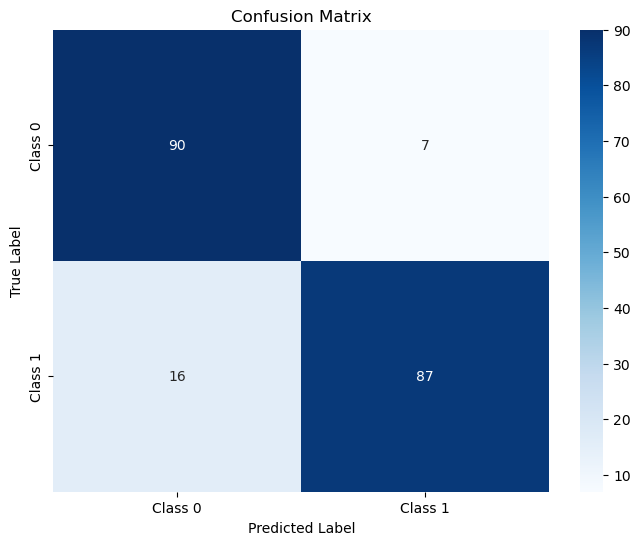

In [9]:
# [9]: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Regularized logistic regression
# Regularization helps prevent overfitting by adding a penalty to the loss function.
# Here, we use L2 regularization (Ridge) with a small penalty term.
model = LogisticRegression(penalty='l2', C=0.4, solver='lbfgs')
model.fit(X_train, y_train)
print('Accuracy with Regularization:', accuracy_score(y_test, model.predict(X_test)))

Accuracy with Regularization: 0.885


In [11]:
# Making predictions on the test dataset
test_predictions = model.predict(X_test)
print('Predictions on Test Set:', test_predictions[:10])  # Displaying only the first few predictions

Predictions on Test Set: [1 0 1 1 0 0 1 0 0 1]


In [ ]:
### Inference for example features
example_features = np.array([[0.5, -1.2, 1.3, 0.7, -0.5]])  # Example features
example_features_scaled = scalar.transform(example_features)  # Apply Standardization
# Making prediction
Inference_prediction = model.predict(example_features_scaled)
print('Prediction for Example Features:', Inference_prediction[0])  # Displaying the prediction for the example features


Prediction for Example Features: 1
